In [1]:
"""
Script to search notebooks for package functions
Authors: Jerry Song (jerrysong1324), Doris Lee (dorisjlee)
"""

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import CategoryService

# Set flag to True to run on filtered notebooks (~500), False to run on all sample notebooks (~5500)
filtered = True

# Set flag to True to analyze each line of code, False to analyze each cell
analyzeLines = True

In [2]:
packageDicts, linesPerCell, codeCellsPerNB = CategoryService.analyzeFrequency(['pandas', 'sklearn'], filtered, analyzeLines)

Searching 584 notebooks for keywords...
Parsed 17530 cells
Parsed 123830 lines


# Investigating Line/Cell Distributions

In [3]:
def graphCellStat(values, xlabel, ylabel):
    plt.hist(values)
    plt.title("Distribution of " + xlabel + "s per " + ylabel + " (Counts)")
    plt.xlabel("Number of " + xlabel + "s")
    plt.ylabel("Number of " + ylabel + "s (Total n=" + str(len(values)) + ")")
    plt.show()
    plt.hist(values, weights=np.ones(len(values)) / len(values))
    plt.title("Distribution of " + xlabel + "s per " + ylabel + " (Proportion)")
    plt.xlabel("Number of " + xlabel + "s")
    plt.ylabel("Proportion of " + ylabel + "s (Total n=" + str(len(values)) + ")")
    plt.show()

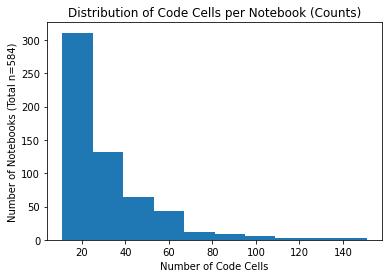

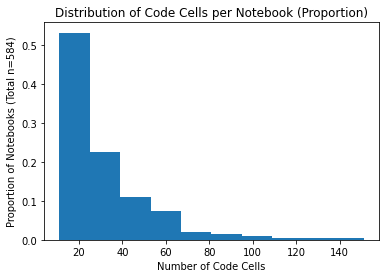

In [4]:
graphCellStat(codeCellsPerNB.values(), "Code Cell", "Notebook")

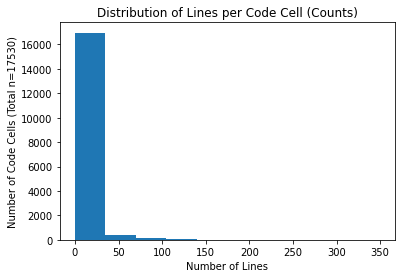

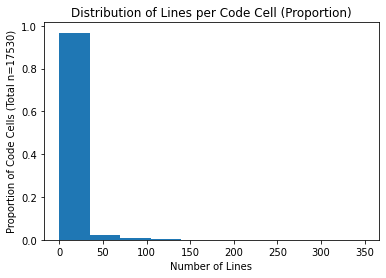

In [5]:
if analyzeLines:
    graphCellStat(linesPerCell.values(), "Line", "Code Cell")

In [6]:
# TODO: return the outliers as well, consider using median and statistical 1.5 IQR definition of outliers
def remove_outliers(data, m=2):
    '''
    returns outliers that are m st dev from mean
    '''
    return data[abs(data - np.mean(data)) < m * np.std(data)]

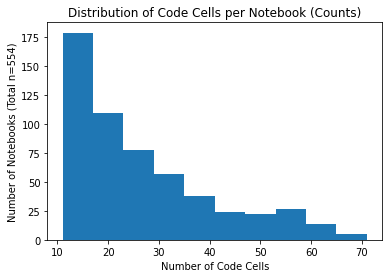

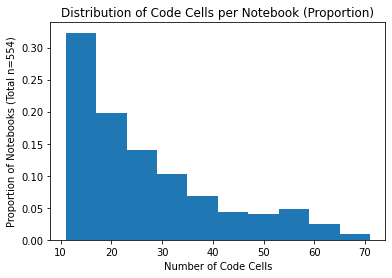

In [7]:
noOutliersCodeCellsPerNB = remove_outliers(np.array(list(codeCellsPerNB.values())))
graphCellStat(noOutliersCodeCellsPerNB, "Code Cell", "Notebook")

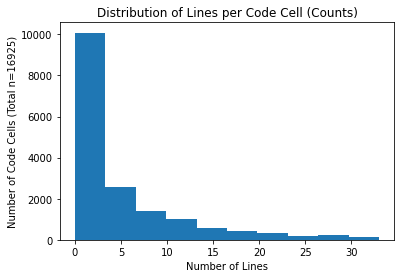

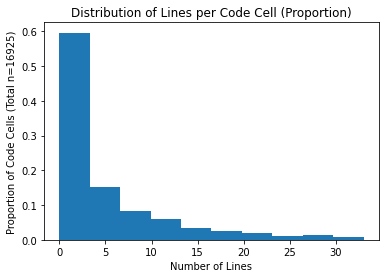

In [8]:
if analyzeLines:
    noOutliersLinesPerCell = remove_outliers(np.array(list(linesPerCell.values())))
    graphCellStat(noOutliersLinesPerCell, "Line", "Code Cell")

**Notes for 2/24**

Think we need to take some time to consider how we store data in df, lots of useful information here including position of cell in notebook

 TODO: Regraph after getting rid of outliers, thinking of using 1.5 * IQR to figure out outliers

# Visualizing Function Distributions

In [9]:
def graphFnCountDist(d, title):
    # Plot bar chart of fn raw counts
    plt.bar(range(len(d)), list(d.values()), align='center')
    plt.xticks(range(len(d)), list(d.keys()))
    plt.xticks(rotation=90)
    plt.title(str(title) + " Function Distribution (Counts)")
    plt.xlabel("Function Names")
    if analyzeLines:
        plt.ylabel("Number of Lines (Total n=" + str(sum(linesPerCell.values())) + ")")
    else:
        plt.ylabel("Number of Cells (Total n=" + str(sum(codeCellsPerNB.values())) + ")")
    plt.show()
    # Plot bar chart of fn proportion within category
    plt.bar(range(len(d)), np.array(list(d.values()))/sum(d.values()), align='center')
    plt.xticks(range(len(d)), list(d.keys()))
    plt.xticks(rotation=90)
    plt.title(str(title) + " Function Distribution (Proportion)")
    plt.xlabel("Function Names")
    if analyzeLines:
        plt.ylabel("Proportion of " + str(title) + " Lines (Total n=" + str(sum(linesPerCell.values())) + ")")
    else:
        plt.ylabel("Proportion of " + str(title) + " Cells (Total n=" + str(sum(codeCellsPerNB.values())) + ")")
    plt.show()

## Pandas Distibutions

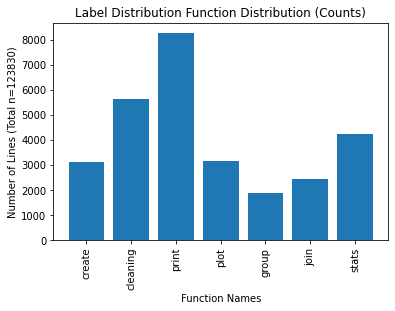

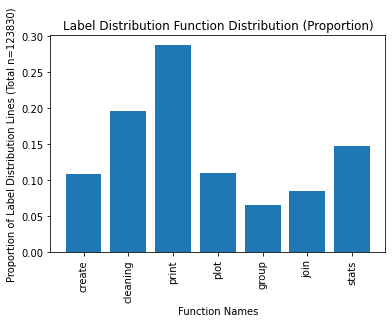

In [10]:
labelDist = {}
pandasFns = packageDicts['pandas']
for fnCount in pandasFns:
    total = sum(pandasFns[fnCount].values())
    labelDist[fnCount] = total

graphFnCountDist(labelDist, "Label Distribution")

In [11]:
if analyzeLines:
    print("Functions found in " + str(sum(labelDist.values())) + " lines out of " + 
          str(sum(linesPerCell.values())) + " lines total")
else: 
    print("Functions found in " + str(sum(labelDist.values())) + " cells out of " + 
          str(len(linesPerCell)) + " cells total")

Functions found in 28759 lines out of 123830 lines total


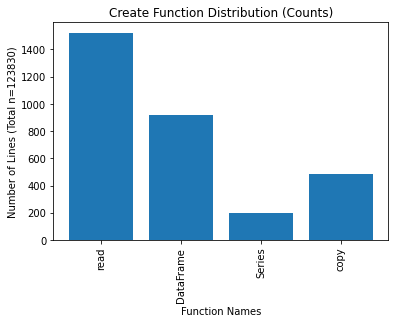

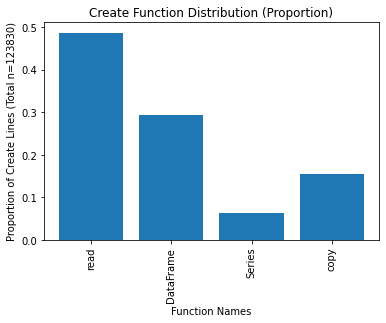

In [12]:
graphFnCountDist(pandasFns['create'], "Create")

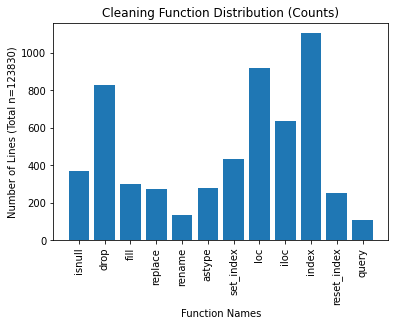

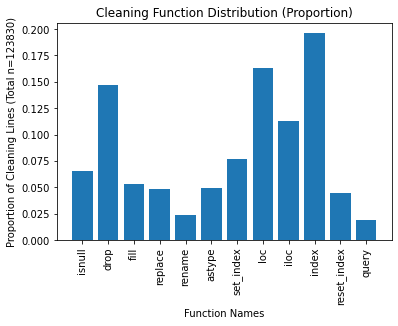

In [13]:
graphFnCountDist(pandasFns['cleaning'], "Cleaning")

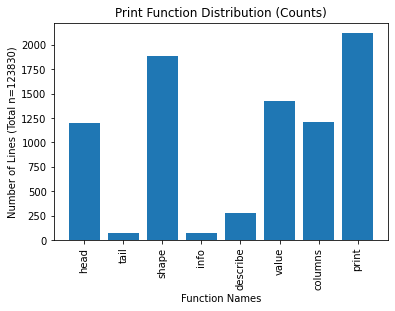

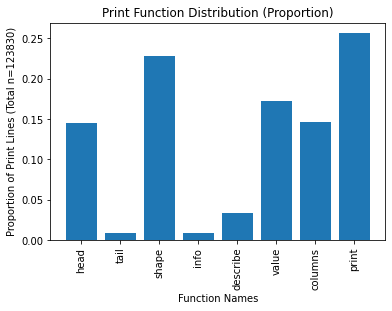

In [14]:
graphFnCountDist(pandasFns['print'], "Print")

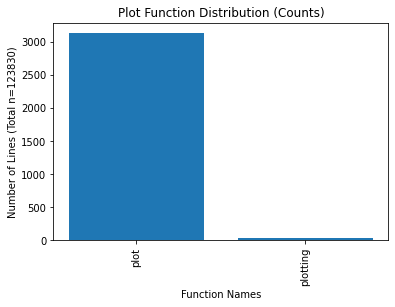

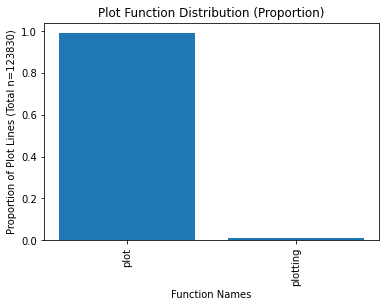

In [15]:
graphFnCountDist(pandasFns['plot'], "Plot")

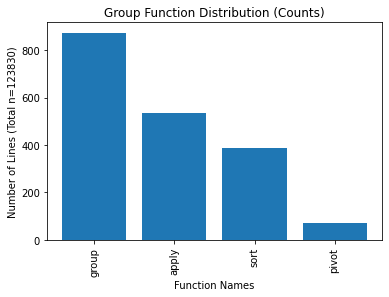

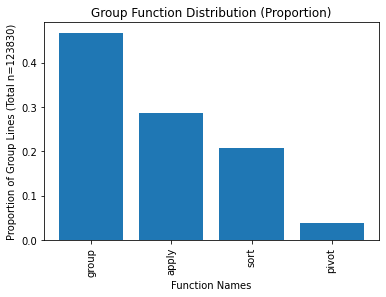

In [16]:
graphFnCountDist(pandasFns['group'], "Group")

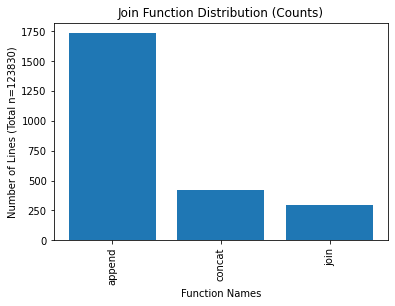

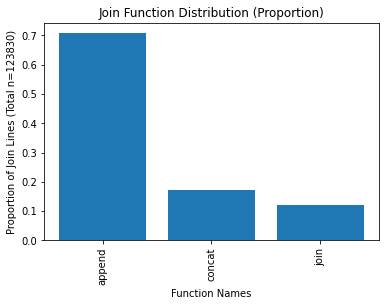

In [17]:
graphFnCountDist(pandasFns['join'], "Join")

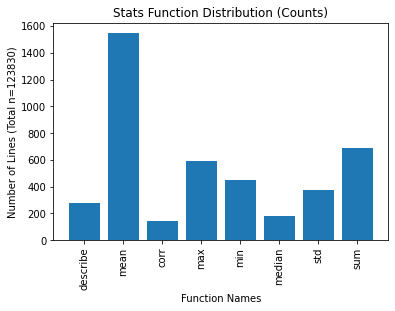

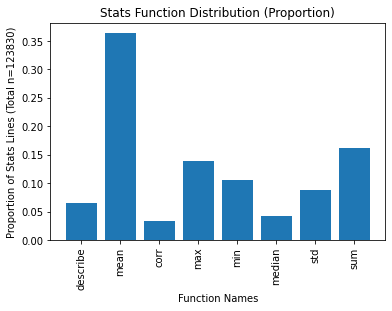

In [18]:
graphFnCountDist(pandasFns['stats'], "Stats")

**Notes for 2/19**

Cells can fall into multiple labels (eg. one cell can have `mean` and `rename` causing it to be in both the stats and cleaning groups).

Not a perfect method of searching for fn names. Right now, I am looking for the "." character concatenated with the function name. Found it difficult to parse the json since `pd.{fn name}` is rare while `{var name}.{fn name}` is much more common.

Stats column probably inflated since `np.mean` would match as well.

Surprising number of cells with pandas functions.

Can repeat process with `sklearn`, but most of `sklearn` is some sort of machine learning (tree, SVM, NN, etc.) with some excpetions like `sklearn.preprocessing` and `sklearn.dataset`.

Some irony here: I'm doing the exact EDA that we are trying to study! I'm going through the motions of preprocessing, loading, clearning, viz, etc.

Looked beyond the sample notebooks, also looked at the corpus analysis scripts. Some interesting analysis beyond just proportion of markdown including clustering of most commonly used packages.

## Visualizing Sklearn Distributions

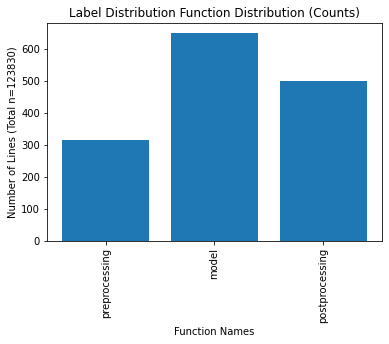

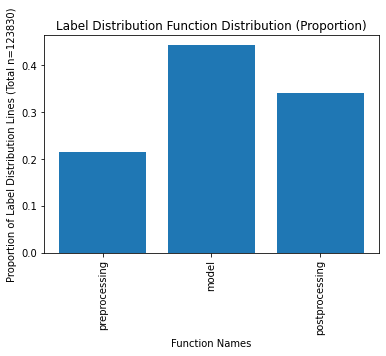

In [19]:
labelDist = {}
sklearnFns = packageDicts['sklearn']
for fnCount in sklearnFns:
    total = sum(sklearnFns[fnCount].values())
    labelDist[fnCount] = total

graphFnCountDist(labelDist, "Label Distribution")

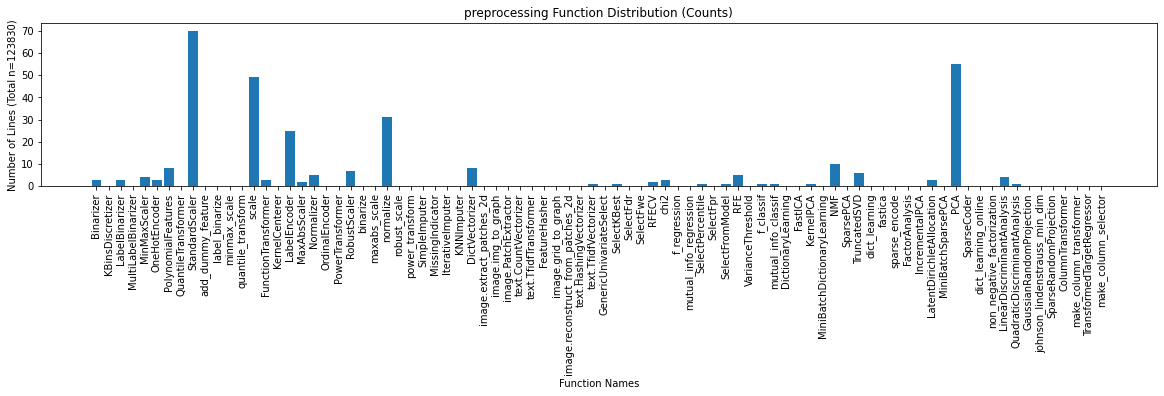

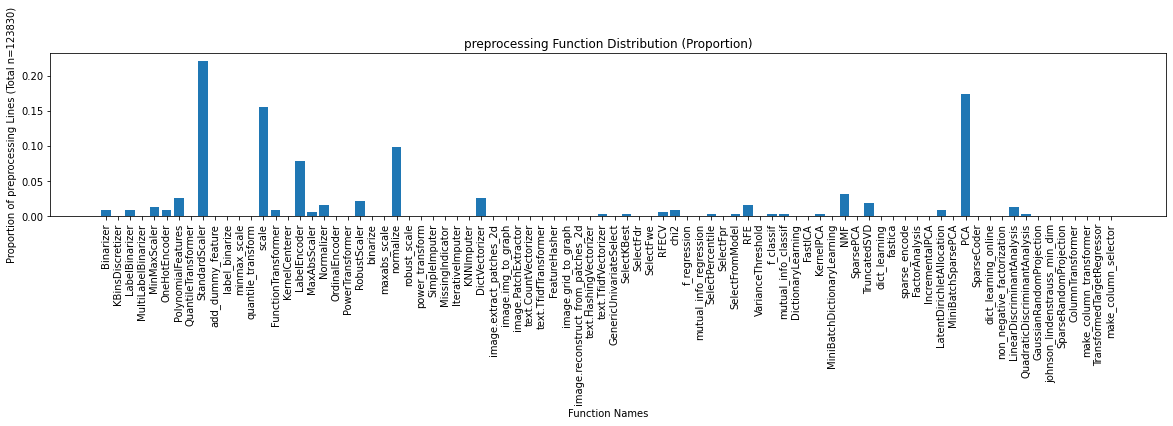

In [20]:
plt.rcParams["figure.figsize"] = (20,3)
graphFnCountDist(sklearnFns['preprocessing'], "preprocessing")

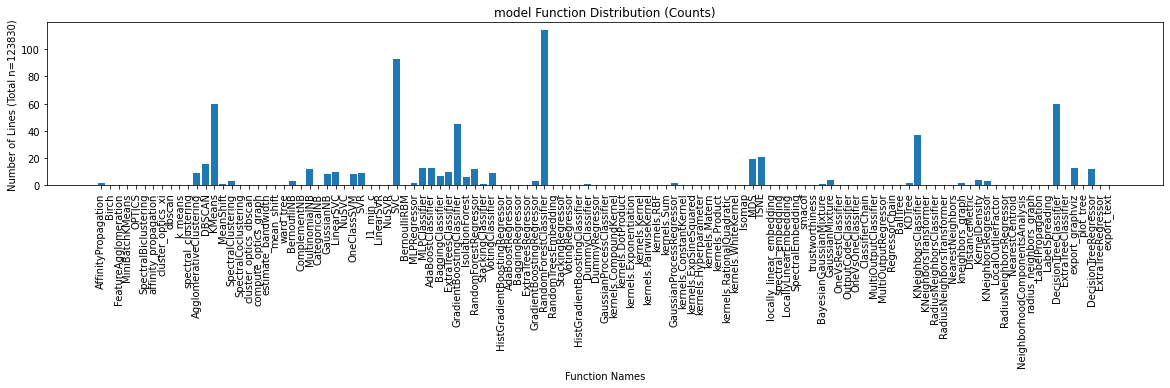

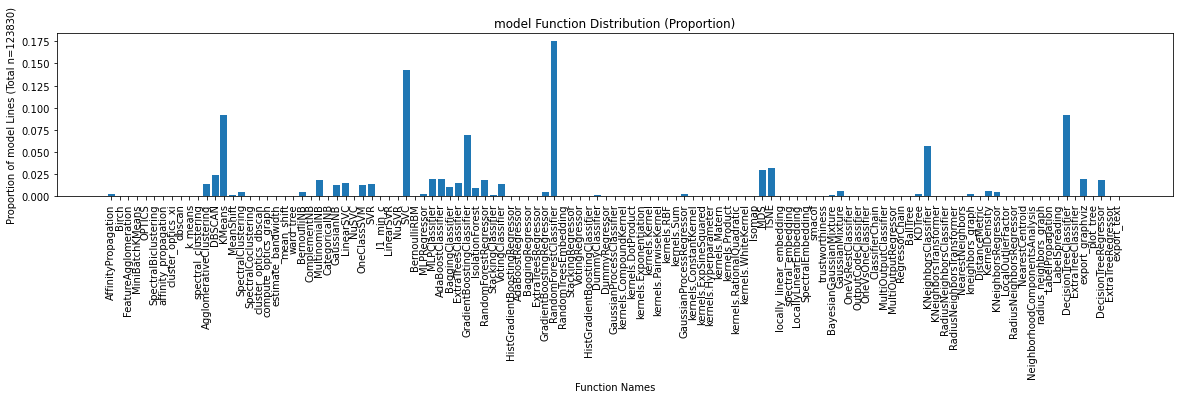

In [21]:
graphFnCountDist(sklearnFns['model'], "model")

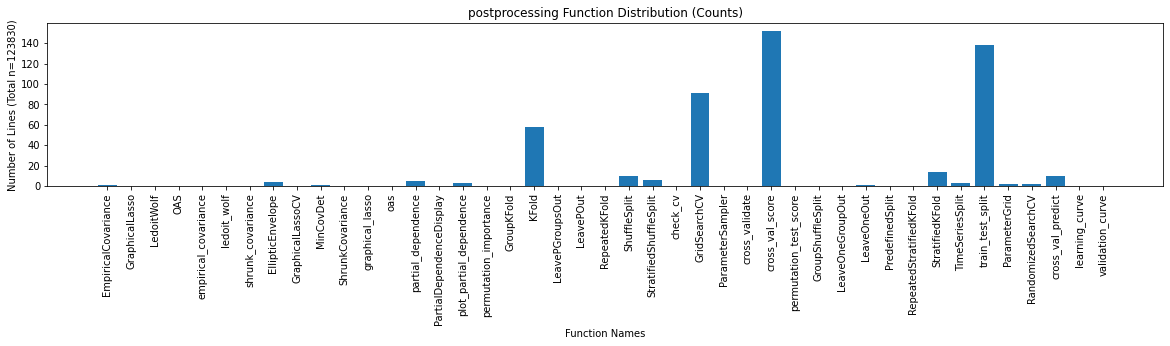

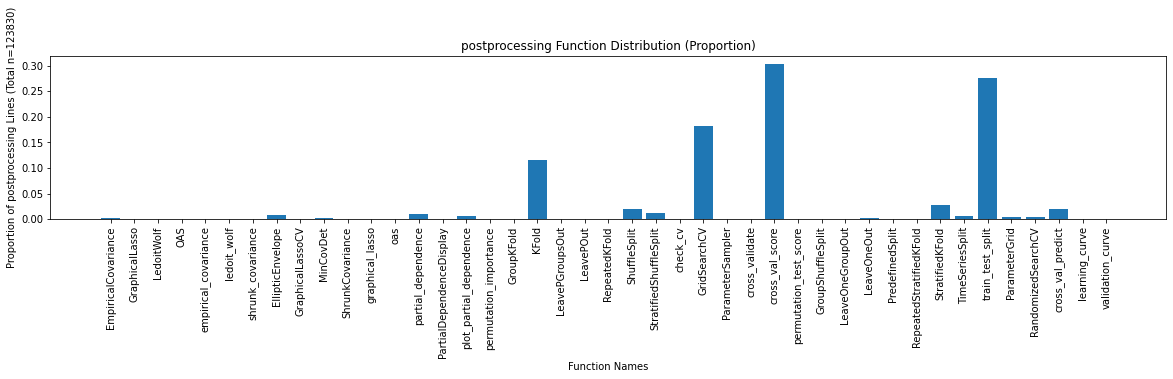

In [22]:
graphFnCountDist(sklearnFns['postprocessing'], "postprocessing")